In [31]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.regularizers import l2
import pandas as pd
from sklearn.model_selection import train_test_split


In [57]:
data=pd.read_csv("D:\\Source_code\\Lab\\data\\seattle-weather.csv")
data=data.drop("date",axis=1)
#data.head()

X=data.drop("weather",axis=1)
Y = pd.get_dummies(data['weather'])

X.head()
Y.head()


,drizzle,fog,rain,snow,sun
0,True,False,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [39]:

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [58]:
def build_model(kernel,reg,dropout):
    reg=l2(0.001) if reg else None
    model=Sequential()
    model.add(Dense(128,activation='relu',kernel_initializer=kernel,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(dropout))
    model.add(Dense(64,activation='relu',kernel_initializer=kernel,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(dropout))
    model.add(Dense(32,activation='relu',kernel_initializer=kernel,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(dropout))
    model.add(Dense(5,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [59]:
config={
    'xavier':['glorot_uniform',0,False],
    'xavier_with_dropout_and_reg':['glorot_uniform',0.1,True],
    'he':['he_uniform',0,False],
    'he_with_droupout_reg':['he_uniform',0.1,True]
}

logs={}

for name,(kernal,dropout,regularizer) in config.items():
    model=build_model(kernal,regularizer,dropout)
    log=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)
    logs[name]=log.history

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6027 - loss: 1.0459 - val_accuracy: 0.7517 - val_loss: 0.8079
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7710 - loss: 0.7682 - val_accuracy: 0.7699 - val_loss: 0.6957
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7838 - loss: 0.6868 - val_accuracy: 0.7768 - val_loss: 0.6534
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7886 - loss: 0.6456 - val_accuracy: 0.7745 - val_loss: 0.6363
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7955 - loss: 0.6191 - val_accuracy: 0.7995 - val_loss: 0.6040
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5137 - loss: 1.5701 - val_accuracy: 0.7358 - val_loss: 0.9211
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6380 - loss: 1.1087 - val_accuracy: 0.7540 - val_loss: 0.8590
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6996 - loss: 0.9675 - val_accuracy: 0.7403 - val_loss: 0.832

dict_items([('xavier', {'accuracy': [0.6027397513389587, 0.7710371613502502, 0.7837573289871216, 0.7886496782302856, 0.7954990267753601], 'loss': [1.0459197759628296, 0.7681795358657837, 0.6868366599082947, 0.6456325054168701, 0.6191304326057434], 'val_accuracy': [0.751708447933197, 0.7699316740036011, 0.7767653465270996, 0.7744874954223633, 0.7995443940162659], 'val_loss': [0.8079476952552795, 0.6956765055656433, 0.6533565521240234, 0.6362740993499756, 0.603979229927063]}), ('xavier_with_dropout_and_reg', {'accuracy': [0.5136986374855042, 0.6379647850990295, 0.6996086239814758, 0.7289628386497498, 0.7465753555297852], 'loss': [1.5700782537460327, 1.1086513996124268, 0.9674846529960632, 0.9425395727157593, 0.8701462745666504], 'val_accuracy': [0.7357630729675293, 0.7539863586425781, 0.7403188943862915, 0.7562642097473145, 0.7744874954223633], 'val_loss': [0.921095609664917, 0.8590132594108582, 0.8327711224555969, 0.8036140203475952, 0.7695053219795227]}), ('he', {'accuracy': [0.6076321

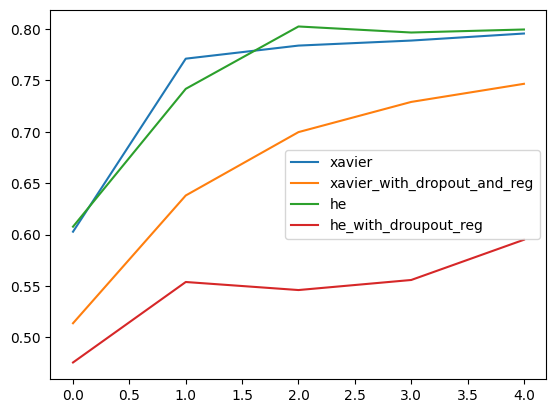

In [60]:
print(logs.items())
for name,history in logs.items():
    plt.plot(history['accuracy'],label=name)
plt.legend()
plt.show()